## HW6-Q3

In [15]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.utils.data as data
import torch.optim as optim
import matplotlib.pyplot as plt

train_set=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,
                                       transform=transforms.ToTensor())
test_set=torchvision.datasets.CIFAR10(root="./data",train=False,download=True,
                                      transform=transforms.ToTensor())

train_loader=data.DataLoader(train_set,batch_size=100,shuffle=True)
test_loader=data.DataLoader(test_set,batch_size=100,shuffle=False)

class MLP(nn.Module):
    def __init__(self):
        super(MLP,self).__init__()
        self.network=nn.Sequential(
            nn.Flatten(),
            nn.Linear(3*32*32,256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128,10)
        )
    def forward(self,x):
        return self.network(x)

model=MLP()

learning_rate=0.01
l2_lambda=0.0001

loss_func=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=learning_rate,weight_decay=l2_lambda)

Files already downloaded and verified
Files already downloaded and verified


In [16]:
num_epoch=100

for epoch in range(num_epoch):
    model.train()
    running_loss=0
    for images,labels in train_loader:
        outputs=model(images)
        loss=loss_func(outputs,labels)
        running_loss+=loss
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print('Epoch {} - loss: {}'.format(epoch,running_loss))

all_preds=[]
all_labels=[]

model.eval()
with torch.no_grad():
    for images,labels in test_loader:
        outputs=model(images)
        loss=loss_func(outputs,labels)
        _,predicted=torch.max(outputs,1)
        all_preds.extend(predicted.numpy())
        all_labels.extend(labels.numpy())


Epoch 0 - loss: 1115.5830078125
Epoch 1 - loss: 1021.7300415039062
Epoch 2 - loss: 978.0801391601562
Epoch 3 - loss: 952.0846557617188
Epoch 4 - loss: 932.6698608398438
Epoch 5 - loss: 916.4351196289062
Epoch 6 - loss: 902.0715942382812
Epoch 7 - loss: 889.9658203125
Epoch 8 - loss: 879.0838623046875
Epoch 9 - loss: 869.3945922851562
Epoch 10 - loss: 860.4180297851562
Epoch 11 - loss: 851.1945190429688
Epoch 12 - loss: 843.663330078125
Epoch 13 - loss: 835.9638671875
Epoch 14 - loss: 830.2979125976562
Epoch 15 - loss: 823.1368408203125
Epoch 16 - loss: 816.7457275390625
Epoch 17 - loss: 811.6392211914062
Epoch 18 - loss: 805.4404907226562
Epoch 19 - loss: 799.4823608398438
Epoch 20 - loss: 793.977294921875
Epoch 21 - loss: 788.6806030273438
Epoch 22 - loss: 783.8004760742188
Epoch 23 - loss: 778.8466186523438
Epoch 24 - loss: 775.9365844726562
Epoch 25 - loss: 771.15673828125
Epoch 26 - loss: 767.33349609375
Epoch 27 - loss: 762.5327758789062
Epoch 28 - loss: 760.2673950195312
Epoch 29

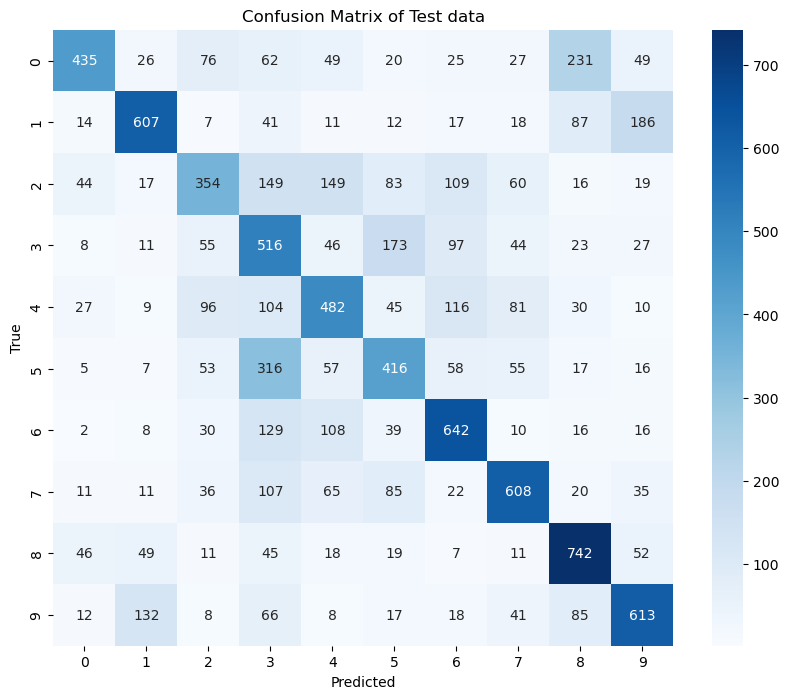

In [17]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(all_labels,all_preds)

plt.figure(figsize=(10, 8))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of Test data')
plt.show()

#### (a) Consider class m. List the class most likely confused for class m for each object type.

In [22]:
import numpy as np
for i in range(10):
    confused_classes=np.argsort(-cm[i,:])   #minus + sort increase = the biggest must in first place
    for confused_class in confused_classes:
        if confused_class!=i:
            print('For class {} ({}), the most likely confused class is {} ({})'.format(
                   i,test_set.classes[i],confused_class,test_set.classes[confused_class]))
            break

For class 0 (airplane), the most likely confused class is 8 (ship)
For class 1 (automobile), the most likely confused class is 9 (truck)
For class 2 (bird), the most likely confused class is 3 (cat)
For class 3 (cat), the most likely confused class is 5 (dog)
For class 4 (deer), the most likely confused class is 6 (frog)
For class 5 (dog), the most likely confused class is 3 (cat)
For class 6 (frog), the most likely confused class is 3 (cat)
For class 7 (horse), the most likely confused class is 3 (cat)
For class 8 (ship), the most likely confused class is 9 (truck)
For class 9 (truck), the most likely confused class is 1 (automobile)


#### (b) Which two classes (object types) are most likely to be confused overall?

In [23]:
cm_no_diagnal=cm-np.eye(10)*cm.diagonal()
idx_max_error=np.argmax(cm_no_diagnal,axis=None)
most_confused_classes = np.unravel_index(idx_max_error,cm.shape)
print('class {} ({}) and class {} ({}) are most likely to be confused overall'.format(
    most_confused_classes[0],test_set.classes[most_confused_classes[0]],most_confused_classes[1],test_set.classes[most_confused_classes[1]]))

class 5 (dog) and class 3 (cat) are most likely to be confused overall
